In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("creditcard.csv") 
df.describe()
print(df.head()) 

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [66]:
print(df.isnull().sum())  

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


<Axes: xlabel='Class', ylabel='count'>

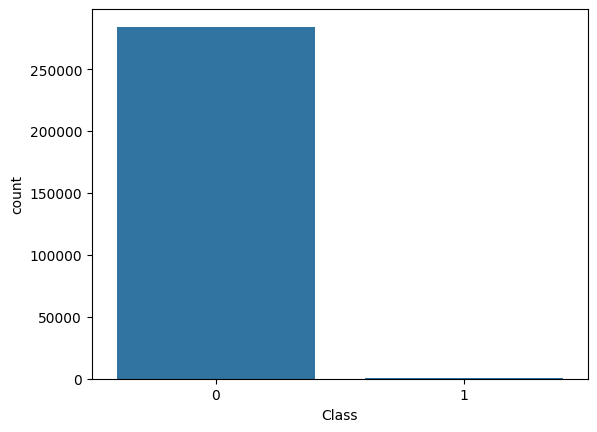

In [67]:
sns.countplot(x=df['Class'])

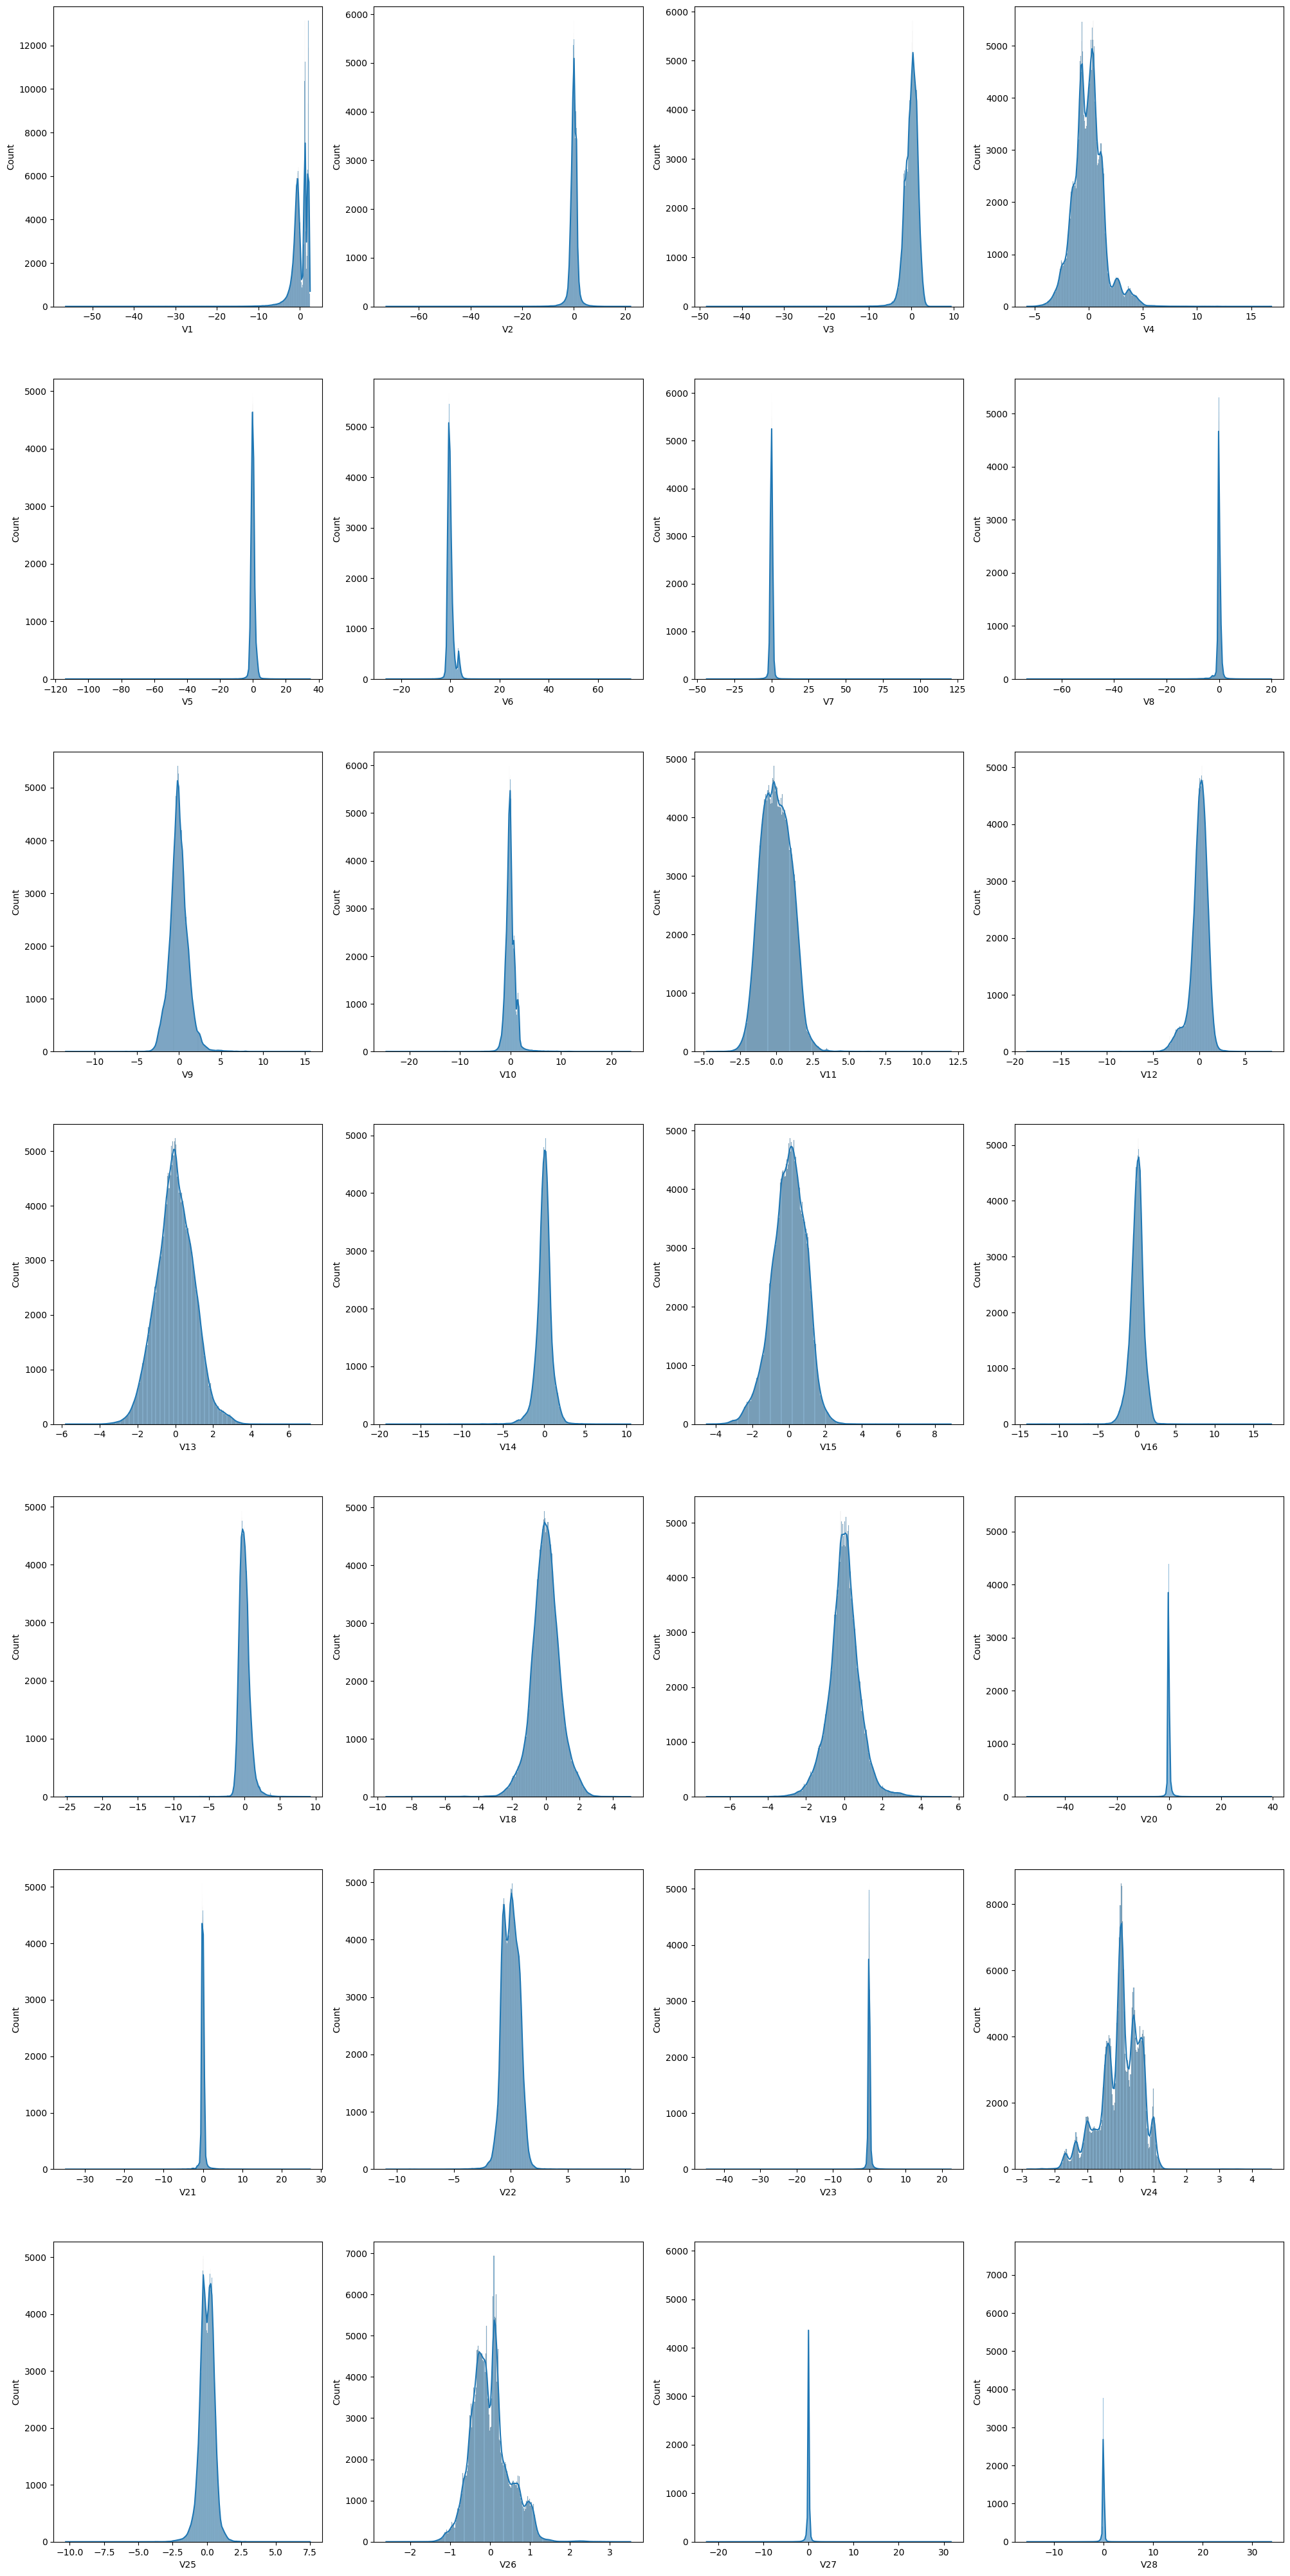

In [68]:
df_temp = df.drop(columns=['Time','Amount', 'Class'], axis=1)

##create plots

fig, ax = plt.subplots(ncols=4, nrows=7, figsize=(20, 40))
index = 0
ax = ax.flatten()

for col in df_temp.columns:
    sns.histplot(df_temp[col], ax=ax[index], kde=True)  
    index += 1

plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=5)

In [69]:
X = df.drop(columns =['Class'], axis=1)
y = df['Class']

In [70]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaler = sc.fit_transform(X)
X_scaler

array([[-1.99658302, -0.69424232, -0.04407492, ...,  0.33089162,
        -0.06378115,  0.24496426],
       [-1.99658302,  0.60849633,  0.16117592, ..., -0.02225568,
         0.04460752, -0.34247454],
       [-1.99656197, -0.69350046, -0.81157783, ..., -0.13713686,
        -0.18102083,  1.16068593],
       ...,
       [ 1.6419735 ,  0.98002374, -0.18243372, ...,  0.01103672,
        -0.0804672 , -0.0818393 ],
       [ 1.6419735 , -0.12275539,  0.32125034, ...,  0.26960398,
         0.31668678, -0.31324853],
       [ 1.64205773, -0.27233093, -0.11489898, ..., -0.00598394,
         0.04134999,  0.51435531]])

In [81]:

correlation_matrix = np.corrcoef(X_scaler.T)
print(np.max(np.abs(correlation_matrix)))  

1.0


In [71]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=42, stratify=y)

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

model = LogisticRegression(max_iter=10000, solver='saga', class_weight='balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     71079
           1       0.03      0.85      0.06       123

    accuracy                           0.95     71202
   macro avg       0.51      0.90      0.52     71202
weighted avg       1.00      0.95      0.97     71202

F1 Score:  0.056170672427761276


In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score
model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.95      0.78      0.86       123

    accuracy                           1.00     71202
   macro avg       0.98      0.89      0.93     71202
weighted avg       1.00      1.00      1.00     71202

F1 Score:  0.8571428571428571


<Axes: xlabel='Class', ylabel='count'>

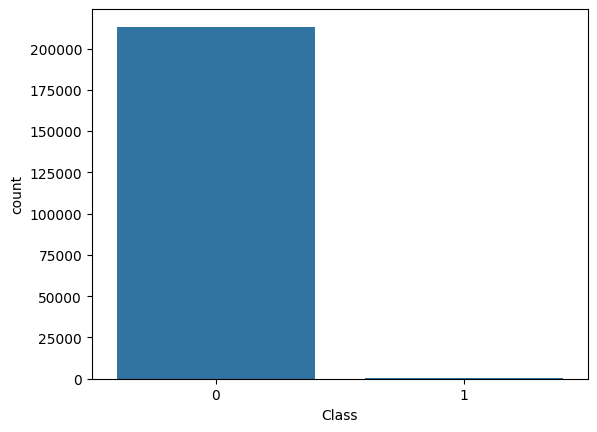

In [74]:
sns.countplot(x=y_train)

In [75]:
from imblearn.over_sampling import SMOTE
over_sample = SMOTE()
X_smote,y_smote = over_sample.fit_resample(X_train, y_train)

<Axes: xlabel='Class', ylabel='count'>

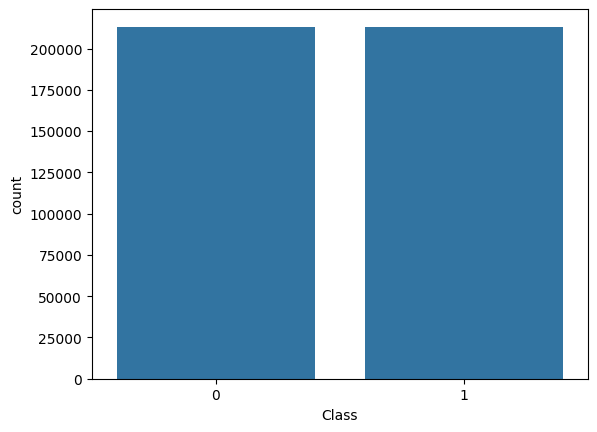

In [76]:
sns.countplot(x=y_smote)

In [77]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

model = LogisticRegression(max_iter=10000, solver='saga', class_weight='balanced')

model.fit(X_smote, y_smote)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     71079
           1       0.13      0.82      0.22       123

    accuracy                           0.99     71202
   macro avg       0.56      0.91      0.61     71202
weighted avg       1.00      0.99      0.99     71202

F1 Score:  0.2227122381477398


In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score
model = RandomForestClassifier()
model.fit(X_smote, y_smote)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.87      0.83      0.85       123

    accuracy                           1.00     71202
   macro avg       0.94      0.91      0.92     71202
weighted avg       1.00      1.00      1.00     71202

F1 Score:  0.85


In [79]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, f1_score
model = XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.95      0.79      0.86       123

    accuracy                           1.00     71202
   macro avg       0.98      0.89      0.93     71202
weighted avg       1.00      1.00      1.00     71202

F1 Score:  0.8622222222222222


In [80]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, f1_score
model = XGBClassifier()
model.fit(X_smote, y_smote)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.83      0.84      0.83       123

    accuracy                           1.00     71202
   macro avg       0.92      0.92      0.92     71202
weighted avg       1.00      1.00      1.00     71202

F1 Score:  0.8340080971659919
